In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../datasets/nyc_taxi.csv')

In [5]:
df.shape

(10320, 2)

In [6]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


Intentemos detectar temporalidad mediante la transformada de fourier.

Periodo estimado: 48.00


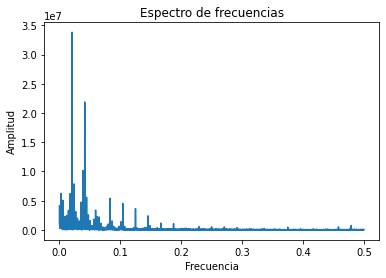

In [7]:
# Transformada de Fourier
fft = np.fft.fft(df["value"])
freq = np.fft.fftfreq(len(df["value"]))

# Filtrar frecuencias positivas
positive_freqs = freq[freq > 0]
positive_fft = np.abs(fft[freq > 0])

# Identificar la frecuencia con mayor amplitud
dominant_frequency = positive_freqs[np.argmax(positive_fft)]
period = 1 / dominant_frequency

print(f"Periodo estimado: {period:.2f}")

# Opcional: graficar espectro
plt.plot(positive_freqs, positive_fft)
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.show()

Periodo estimado 48, hace referencia a 24*2, es mas o menos cierto, el periodo que mejor se ajusta a nuestro análisis deberia ser el semanal :(.

In [ ]:
dominant_frequencies = np.argsort(positive_fft)[::-1]
top_frequencies = positive_freqs[dominant_frequencies]
periods = 1 / top_frequencies

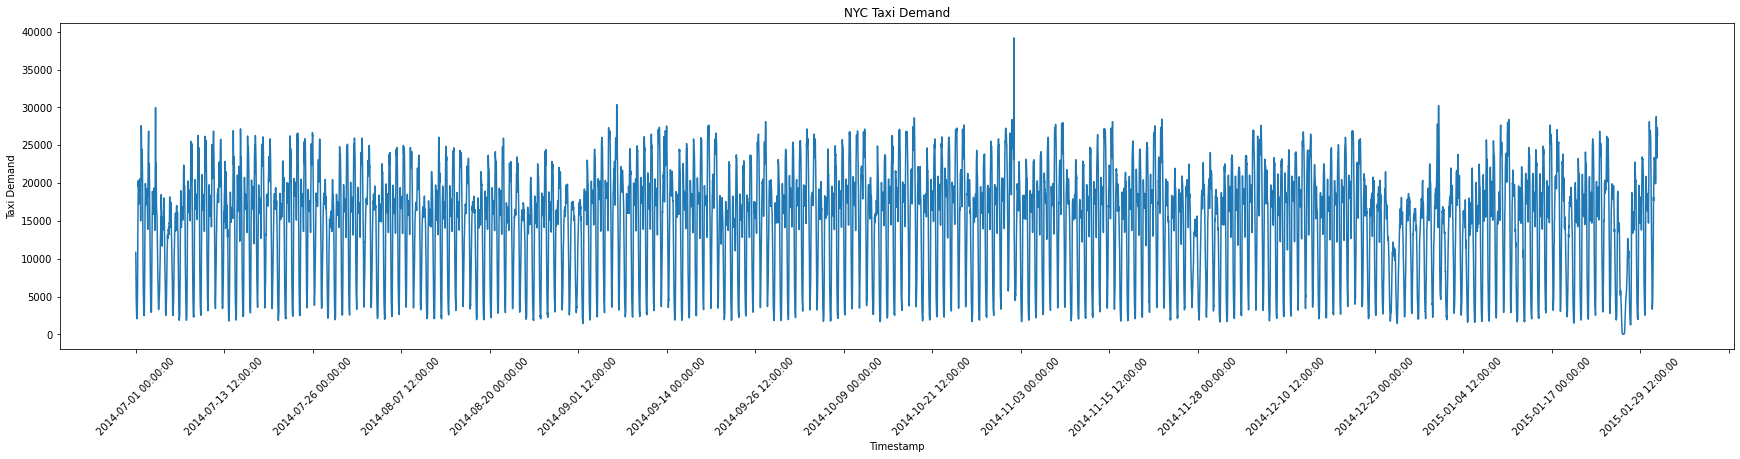

In [27]:
plt.figure(figsize=(30, 6))
dfr = df#[0:10000]
plt.plot(dfr['timestamp'], dfr['value'])
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.ylabel('Taxi Demand')
plt.title('NYC Taxi Demand')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
plt.show()